# Pizza Sales Data Analysis
## (Python, SQL, Seaborn, Matplotlib, plotly, Excel and others)

In [104]:
import pandas as pd
import decimal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import psycopg2
from psycopg2 import sql

# Replace with your database credentials
DB_NAME = "sql"
USER = "postgres"
PASSWORD = "Ayush@12345"
HOST = "localhost"  # Use "localhost" if the database is on your machine
PORT = "5433"       # PostgreSQL port

try:
    # Establish a connection
    connection = psycopg2.connect(
        dbname=DB_NAME,     # Use the variables defined above
        user=USER,
        password=PASSWORD,
        host=HOST,
        port=PORT
    )
    
    # Create a cursor object
    cursor = connection.cursor()
    
    print("Connected to PostgreSQL database.")

except Exception as e:
    print("An error occurred:", e)

# No connection closing here as requested


Connected to PostgreSQL database.


## Data Extraction

In [15]:
query = """select * from pizza """

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns=[desc[0] for desc in cursor.description])

df.head()



,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingrediant,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.5,18.5,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16,16,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## KPI

We need to analyze the 'Key Indicators' for our pizza sales data to gain insights into our business performance. Specifically, we want to Calculate  the folloing metrics:-

## Total Revenue

We have to summize of total price of all pizza orders. Total revenue provides a snapshot of the business's financial performance over a specific period. Tracking revenue helps identify growth trends, seasonal fluctuations, and the overall health of the business. By comparing total revenue over different periods (monthly, quarterly, or yearly), the client can assess the effectiveness of business strategies and identify opportunities for growth.

In [27]:
query = """SELECT SUM(total_price) AS Total_Revenue FROM pizza;"""

cursor.execute(query)

data = cursor.fetchall()

print("Total Revenue:",data)

Total Revenue: [(Decimal('817860.05'),)]


## Average Order Value

We have to find the average amount spent per order. AOV helps identify how much customers are willing to spend per order. By analyzing AOV trends, the client can optimize menu pricing and promotions to increase revenue. Tracking changes in AOV before and after promotional campaigns helps assess their effectiveness. If AOV increases during a promotion, it indicates that the marketing strategy successfully encouraged higher spending. AOV can help the client predict demand for specific items, enabling better inventory management. If higher AOV items are identified, the client can ensure they have sufficient stock.

In [135]:
query = """SELECT (SUM(total_price) / COUNT(DISTINCT order_id)) AS Avg_order_Value FROM pizza;"""

cursor.execute(query)

data = cursor.fetchall()

print("\n Average Order Value: \n",data)


 Average Order Value: 
 [(Decimal('38.3072622950819672'),)]


## Total Pizza Sold (Quantity)
Here we find the summation of the quantity of pizzas sold.Total pizzas sold provides a clear indication of overall demand for the product. This helps the client gauge the popularity of their offerings and identify peak sales periods. By comparing total pizzas sold across different time frames (e.g., month over month or year over year), the client can evaluate sales growth trends and measure the effectiveness of sales strategies. Tracking total pizzas sold during promotional campaigns enables the client to assess which promotions drive sales and which do not, allowing for better-targeted marketing efforts.

In [31]:
query = """SELECT SUM(quantity) AS Total_pizza_sold FROM pizza"""

cursor.execute(query)

data = cursor.fetchall()

print("\n Total Pizzas Sold: \n", data)


 Total Pizzas Sold: 
 [(49574,)]


## Average Pizzas Per Order
We will find the average number of pizzas sold per order. This metric provides insights into customer buying behavior, helping the client understand how many pizzas customers typically order at once. Analyzing these patterns can reveal preferences for larger orders, which can be useful for targeting family or group promotions. Knowing the average number of pizzas sold per order allows the client to segment customers based on their purchasing habits, enabling tailored marketing strategies to different customer groups. If the average number of pizzas sold per order is low, the client can implement upselling strategies, such as offering discounts on additional pizzas or promotions for larger orders, to encourage customers to buy more. Understanding how many pizzas are typically ordered can inform menu design and pricing strategies, such as creating combo deals or family-sized options that encourage higher order volumes.

In [40]:
query = """SELECT CAST(CAST(SUM(quantity) AS DECIMAL(10,2)) / 
CAST(COUNT(DISTINCT order_id) AS DECIMAL(10,2)) AS DECIMAL(10,2))
AS Avg_Pizzas_per_order
FROM pizza
"""

cursor.execute(query)

data = cursor.fetchall()

print("\n Average Orders: \n",data)


 Average Orders: 
 [(Decimal('2.32'),)]


# Other Chart Requirements

To enhance our understanding of key trends within our pizza sales data, we aim to create a series of visualizations that will provide valuable insights. We have identified the following essential requirements for developing these charts:

## Daily Trend of Total Orders

To visualize the daily trend of total orders, we will create a bar chart that displays the number of orders for each day of the week. This will help us identify any seasonal patterns, such as peak sales days or holiday periods. Tracking the daily trend of total orders allows the client to identify patterns and fluctuations in sales. Understanding these trends can help in forecasting future demand and making informed business decisions. Understanding daily order trends helps the client manage inventory more effectively, ensuring they have enough ingredients on hand during busy periods while minimizing waste during slower days. The client can use daily order data to tailor marketing campaigns and promotions to specific days when sales are typically lower, helping to boost orders and overall revenue.



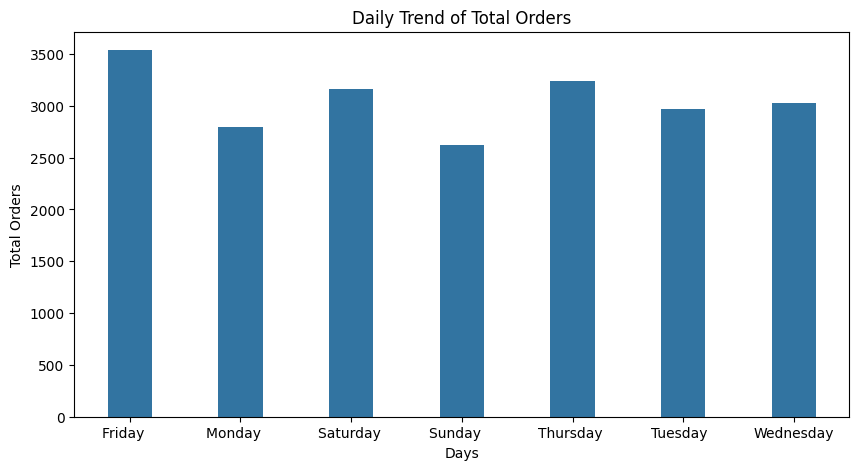

In [55]:
query = """SELECT To_char(order_date, 'Day') AS order_day, COUNT(DISTINCT order_id) AS total_orders 
FROM pizza
GROUP BY to_char(order_date, 'Day')
"""

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns=['Days', 'Total Orders'])
df.head()

plt.figure(figsize=(10,5))
sns.barplot(x='Days', y='Total Orders', data=df, width=0.4)
plt.title('Daily Trend of Total Orders')
plt.show()

## Hourly Trend of Total Orders
Here we have to find the total orders recived on hourly basis. This will help us to identify peak hours or periods of high order activity. By knowing the busiest hours, the client can adjust staffing levels accordingly. This ensures that they have the right number of employees to handle customer demand, enhancing service efficiency and customer satisfaction. Hourly trends provide insights into customer behavior, such as preferred ordering times for lunch, dinner, or late-night snacks. This data can inform marketing strategies and menu design. The client can design promotions or discounts to target specific hours when sales are low, encouraging more orders and maximizing revenue throughout the day.

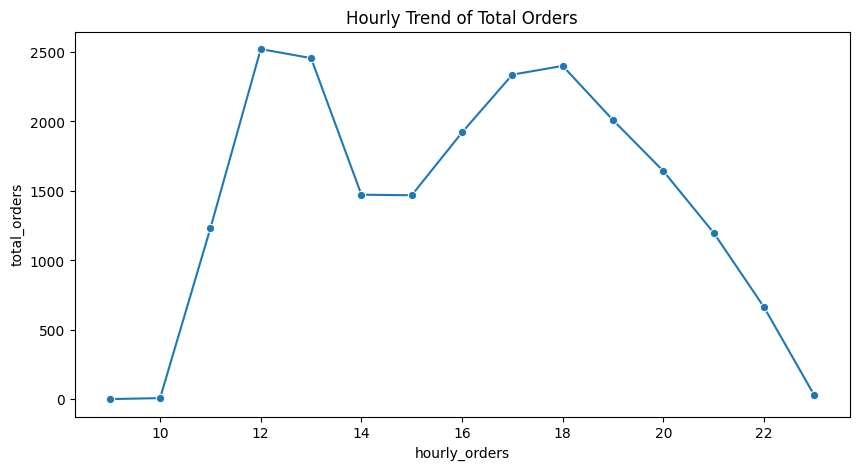

In [77]:
query = """ SELECT DATE_PART('hour', order_time) As hourly_orders, COUNT (DISTINCT order_id) As total_orders
FROM pizza
GROUP BY DATE_PART('hour', order_time)
"""

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns=['hourly_orders','total orders'])

plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='hourly_orders', y='total orders', marker='o')
plt.title('Hourly Trend of Total Orders')
plt.xlabel('hourly_orders')
plt.ylabel('total_orders')

plt.show()



## Percentage of Sales by Pizza Category
We have to find the percentage of sales by various category of pizza's. the percentage of sales by pizza category (e.g., vegetarian, non-vegetarian, specialty, or gourmet) provides insights into which categories contribute most to overall sales. This helps the client understand their product mix and identify customer preferences. Understanding sales percentages allows the client to assess the effectiveness of their menu offerings. They can make informed decisions about which categories to promote more heavily, potentially adjusting the menu to better align with customer preferences.

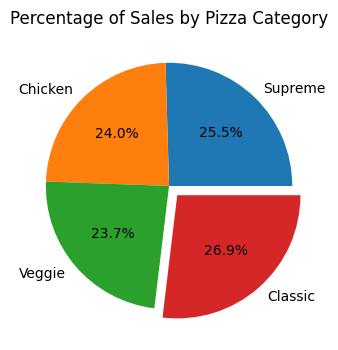

,pizza_category,total_revenue,PCT
0,Supreme,208197.00,25.46
1,Chicken,195919.50,23.96
2,Veggie,193690.45,23.68
3,Classic,220053.10,26.91


In [136]:
query = """SELECT pizza_category, CAST(SUM(total_price) AS DECIMAL(10,2)) as total_revenue,
CAST(SUM(total_price) * 100 / (SELECT SUM(total_price) from pizza) AS DECIMAL(10,2)) AS PCT
FROM pizza
GROUP BY pizza_category"""

cursor.execute(query)
data = cursor.fetchall()

df= pd.DataFrame(data, columns=['pizza_category','total_revenue', 'PCT'])
largest_idx = df['PCT'].idxmax()  # Gets the index of the max value in PCT
explode = [0.1 if i == largest_idx else 0 for i in range(len(df))]

plt.figure(figsize=(4, 4))
plt.pie(
    df['PCT'],  # Percentages for each category
    labels=df['pizza_category'],  # Category labels
    autopct='%1.1f%%',  # Show values as percentages with 1 decimal
    #startangle=140  # Rotate for better layout
    explode=explode  # Explode the largest category to make it stand out more
)
plt.title('Percentage of Sales by Pizza Category')
plt.show()
df.head()


## Percentage of Sales by Pizza Size
We need to find percebtage of sale swith respect to te pizza size. Analyzing the percentage of sales by pizza size helps the client understand which sizes (small, medium, large, etc.) are most popular among customers. This information can guide menu design and inventory management. Knowing which sizes sell best can inform decisions about menu layout and item prominence. For example, if large pizzas account for a significant percentage of sales, the client may want to highlight these options in their marketing materials. Understanding the distribution of sales by pizza size enables the client to create targeted promotions. For instance, if small pizzas are underperforming, the client can offer discounts or promotions specifically for that size to boost sales.

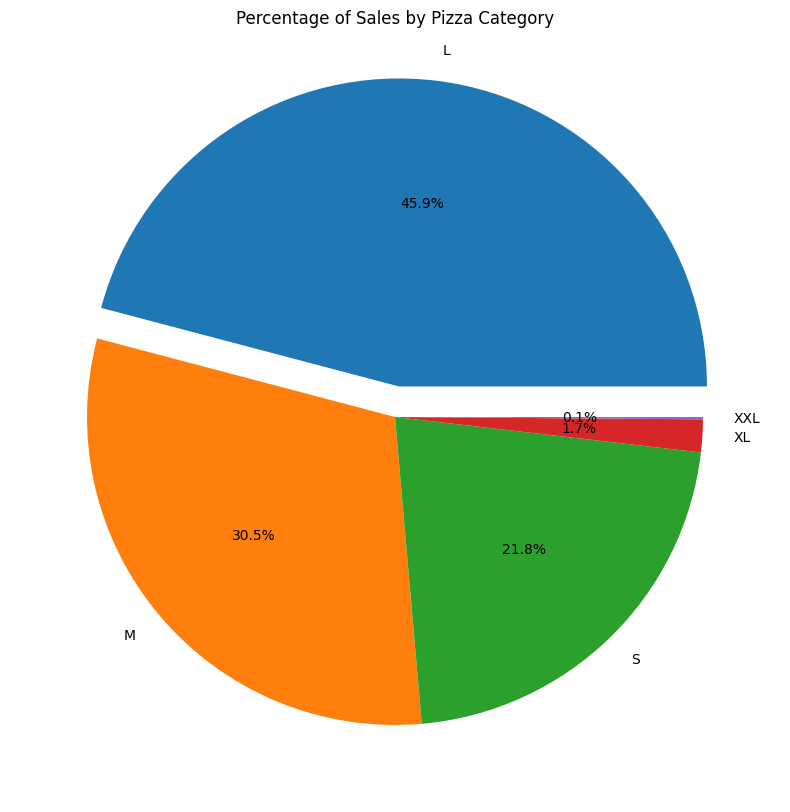

,pizza_size,total_revenue,PCT
0,L,375318.70,45.89
1,M,249382.25,30.49
2,S,178076.50,21.77
3,XL,14076.00,1.72
4,XXL,1006.60,0.12


In [100]:
query = """SELECT pizza_size, CAST(SUM(total_price) AS DECIMAL(10,2)) as total_revenue,
CAST(SUM(total_price) * 100 / (SELECT SUM(total_price) from pizza) AS DECIMAL(10,2)) AS PCT
FROM pizza
GROUP BY pizza_size
ORDER BY pizza_size
"""

cursor.execute(query)
data = cursor.fetchall()

df= pd.DataFrame(data, columns=['pizza_size','total_revenue', 'PCT'])
largest_idx = df['PCT'].idxmax()  # Gets the index of the max value in PCT
explode = [0.1 if i == largest_idx else 0 for i in range(len(df))]

plt.figure(figsize=(10, 10))
plt.pie(
    df['PCT'],  # Percentages for each category
    labels=df['pizza_size'],  # Category labels
    autopct='%1.1f%%',  # Show values as percentages with 1 decimal
    #startangle=140  # Rotate for better layout
    explode=explode  # Explode the largest category to make it stand out more
)
plt.title('Percentage of Sales by Pizza Category')
plt.show()
df.head()

## Total Pizza Sold by Pizza Category
We will calulate the total pizzas sold based on the pizza category. By categorizing pizzas (e.g., by toppings, crust type, or size) and tracking sales, your client can see which categories are the most popular. This insight helps prioritize inventory and tailor offerings to match customer tastes. Different pizza categories may require different ingredients. For example, vegetarian pizzas would need more fresh veggies, while meat pizzas may need more specific meats. Understanding demand for each category can lead to more efficient ordering and stock management. With data on category popularity, they can run specific campaigns to promote high-margin but less popular categories or offer discounts to increase the sales of certain types, such as vegan or gluten-free pizzas.



In [119]:
query = """SELECT pizza_category, SUM(quantity) as Total_Quantity_Sold
FROM pizza
GROUP BY pizza_category
ORDER BY Total_Quantity_Sold DESC

"""

cursor.execute(query)
data = cursor.fetchall()

df= pd.DataFrame(data, columns=['pizza_category','Total_Quantity_Sold'])

fig = px.funnel(
    df,
    x='pizza_category',  # The size of each funnel section
    y='Total_Quantity_Sold'   # The stages or categories
)
fig.update_layout(title="Total Pizza Sold by Pizza Category")
fig.show()
df.head()


,pizza_category,Total_Quantity_Sold
0,Classic,14888
1,Supreme,11987
2,Veggie,11649
3,Chicken,11050


## Top 5 Best Sellers by Total Pizza Sold
We need to find the Top 5 best selling Pizza. Identifying the top 5 best-sellers highlights which flavors, toppings, or combinations resonate most with customers. This information helps the client understand the core products that drive customer loyalty and repeat orders. By knowing the top performers, the client can center marketing efforts around these best-sellers. Promotions like "Fan Favorites" or "Top 5 Picks" can attract new customers by showcasing popular options. Limited-time discounts or bundles including these pizzas can further boost sales. Insights into what makes these pizzas popular can inform new product ideas. For example, if a certain topping is a common factor among best-sellers, the client might experiment with new varieties that incorporate it. Preparing for high demand on the best-selling pizzas ensures the kitchen is stocked with the right ingredients, reducing prep time and keeping up with demand. Streamlining inventory based on best-sellers avoids waste while improving speed and customer satisfaction.

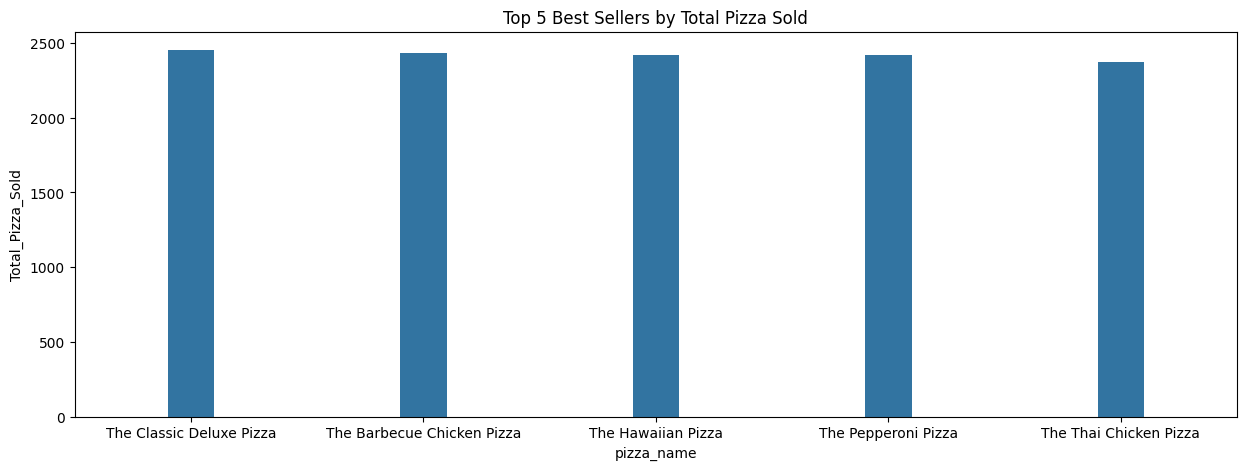

,pizza_name,Total_Pizza_Sold
0,The Classic Deluxe Pizza,2453
1,The Barbecue Chicken Pizza,2432
2,The Hawaiian Pizza,2422
3,The Pepperoni Pizza,2418
4,The Thai Chicken Pizza,2371


In [130]:
query = """SELECT pizza_name, SUM(quantity) AS Total_Pizza_Sold
FROM pizza
GROUP BY pizza_name
ORDER BY Total_Pizza_Sold DESC
Limit 5

"""

cursor.execute(query)
data = cursor.fetchall()

df= pd.DataFrame(data, columns=['pizza_name','Total_Pizza_Sold'])
plt.figure(figsize=(15,5))
sns.barplot(df, x='pizza_name', y='Total_Pizza_Sold', width=0.2)
plt.title('Top 5 Best Sellers by Total Pizza Sold')
plt.show()
df.head()

## Top 5 Worst Sellers by Total Pizza Sold
We need to find the top 5 worst selling pizzas.Understanding which pizzas underperform enables the client to make data-driven decisions about potentially removing or adjusting these items. If a pizza consistently has low sales, it may be better to replace it with a new option that better suits customer tastes. Low sales might indicate that certain pizzas lack appeal in flavor, ingredients, or price. The client can experiment by adjusting toppings, sizes, or prices to test if changes make these pizzas more attractive to customers. Less popular pizzas may lead to inventory waste if their ingredients are rarely used in other menu items. Identifying these low-sellers allows the client to streamline ingredient sourcing, reduce waste, and manage costs more effectively.

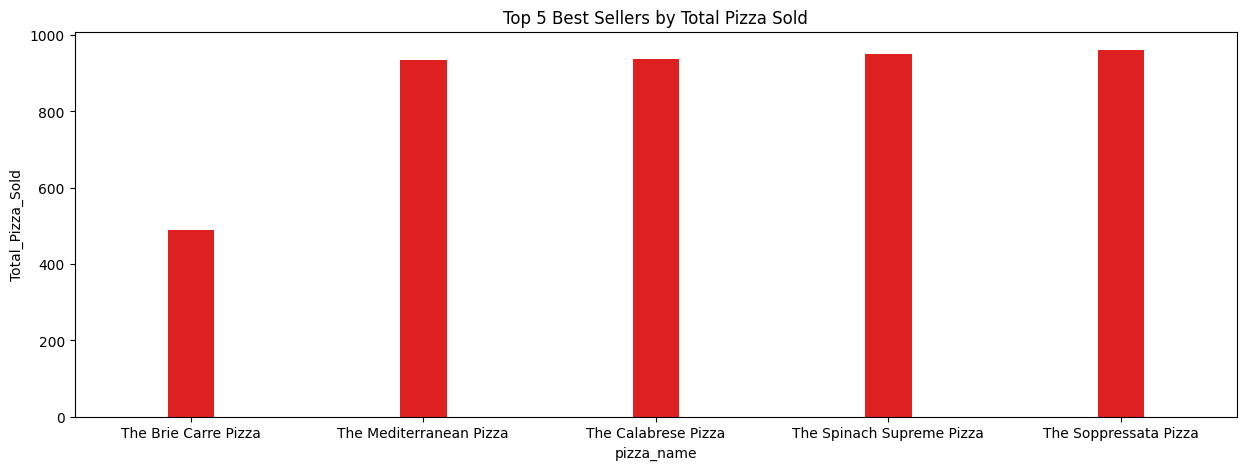

,pizza_name,Total_Pizza_Sold
0,The Brie Carre Pizza,490
1,The Mediterranean Pizza,934
2,The Calabrese Pizza,937
3,The Spinach Supreme Pizza,950
4,The Soppressata Pizza,961


In [134]:
query = """SELECT pizza_name, SUM(quantity) AS Total_Pizza_Sold
FROM pizza
GROUP BY pizza_name
ORDER BY Total_Pizza_Sold ASC
Limit 5

"""

cursor.execute(query)
data = cursor.fetchall()

df= pd.DataFrame(data, columns=['pizza_name','Total_Pizza_Sold'])
df= pd.DataFrame(data, columns=['pizza_name','Total_Pizza_Sold'])
plt.figure(figsize=(15,5))
sns.barplot(df, x='pizza_name', y='Total_Pizza_Sold', width=0.2, color='red')
plt.title('Top 5 Best Sellers by Total Pizza Sold')
plt.show()

df.head()


In [122]:
connection.rollback()